# Time Series: Linear Regression

We are using regression model to predict future sales by considering time as a Independent Variable

* Linear Regression fits linear line.
* Regression line just capture the trend of the data.
* It did not capture the seasonality effect in the data.
* For forecasting the data w.r.t time, margin of error is high.

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('data/sales_data.csv')

df.head()

,Years,Sales
0,2001-01-01,139.7
1,2001-02-01,114.3
2,2001-03-01,101.6
3,2001-04-01,152.4
4,2001-05-01,215.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 2 columns):
Years    72 non-null object
Sales    72 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.2+ KB


### Data Preprocessing

In [7]:
df['Years'] = pd.to_datetime(df['Years'])

df.dtypes

Years    datetime64[ns]
Sales           float64
dtype: object

In [13]:
df['time'] = np.arange(1, len(df)+1, 1)

df.head()

,Years,Sales,time
0,2001-01-01,139.7,1
1,2001-02-01,114.3,2
2,2001-03-01,101.6,3
3,2001-04-01,152.4,4
4,2001-05-01,215.9,5


In [14]:
df['month_name'] = df['Years'].dt.month_name()

df.head()

,Years,Sales,time,month_name
0,2001-01-01,139.7,1,January
1,2001-02-01,114.3,2,February
2,2001-03-01,101.6,3,March
3,2001-04-01,152.4,4,April
4,2001-05-01,215.9,5,May


In [17]:
# Split the data into train(4 years) and test set(2 years)
size = 4*12
df_train = df.iloc[:size]
df_test = df.iloc[size:]

print(df_train.tail())
print('\n')
print(df_test.head())

        Years  Sales  time month_name
43 2004-08-01  431.8    44     August
44 2004-09-01  330.2    45  September
45 2004-10-01  330.2    46    October
46 2004-11-01  304.8    47   November
47 2004-12-01  292.1    48   December


        Years  Sales  time month_name
48 2005-01-01  266.7    49    January
49 2005-02-01  317.5    50   February
50 2005-03-01  368.3    51      March
51 2005-04-01  431.8    52      April
52 2005-05-01  457.2    53        May


In [19]:
# Split the data into independent and dependent
x_train = df_train[['time']].values
x_train.shape

(48, 1)

In [20]:
y_train = df_train['Sales'].values
y_train.shape

(48,)

In [23]:
# Split the data into independent and dependent
x_test = df_test[['time']].values
y_test = df_test['Sales'].values


### Linear Regression with Time

In [21]:
from sklearn.linear_model import LinearRegression

In [22]:
model_trend = LinearRegression()
model_trend.fit(x_train, y_train)

LinearRegression()

In [24]:
y_fitted_vals = model_trend.predict(x_train)

In [39]:
y_forecast = model_trend.predict(x_test)

**confidence interval - 95% = 1.96**

CI = $\mu +- ME $

- ME = z * SE
- z = 1.96 (for 95% CI)
- SE = standard deviation of the error

In [45]:
error = y_train - y_fitted_vals
se = error.std()
ME = 1.96 * se

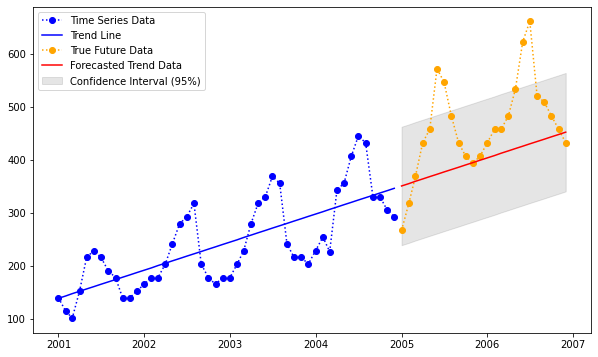

In [47]:
# visulaize the values
plt.figure(figsize=(10, 6))
plt.plot(df_train['Years'], y_train, 'bo:')
plt.plot(df_train['Years'], y_fitted_vals, 'b')


# Forecasted Data
plt.plot(df_test['Years'], y_test, 'o:', color='orange')
plt.plot(df_test['Years'], y_forecast, color='red')

# MOE
ci_plus, ci_minus = y_forecast + ME, y_forecast - ME
plt.fill_between(df_test['Years'], (ci_plus), (ci_minus), alpha=0.1, color='black')

plt.legend(['Time Series Data', 'Trend Line', 'True Future Data', 'Forecasted Trend Data', 'Confidence Interval (95%)'])
plt.show()

In [49]:
y_pred_new = model_trend.predict([[61]])

In [54]:
y_pred_new + ME, y_pred_new - ME 
print(f"Predicted value lie between {(y_pred_new - ME)[0]} and {(y_pred_new + ME)[0]}")

Predicted value lie between 291.67694148287416 and 514.8953338102217
